## Определение перспективного тарифа для телеком компании

### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1)
- [Предобработка данных](#step2)
- [Дополнительные вычисления](#step3)
- [Исследовательский анализ данных](#step4)
- [Проверка гипотез](#step5)
- [Общий вывод](#step6)

---

### План исследования
- Привести данные, где необходимо, к нужным типам;
- Найти и исправить ошибки в данных.

---

- Проанализировать, сколько минут разговора, сообщений и интернет-трафика требуется пользователям каждого тарифного плана в месяц;
- Посчитать среднее, дисперсию и стандартное отклонение;
- Построить гистограммы и описать распределения.

---

- Проверить гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается";
- Проверить гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

---

- Написать общий вывод.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial

In [2]:
# импортируем датасет calls
calls = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Определение перспективного тарифа для телеком-компании/calls.csv')

In [3]:
# первичное представление о данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
# первые 5 строк
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
# проверим датасет на уникальные значения
for column in calls.columns:
    print(calls[column].value_counts())

1041_1      1
1081_496    1
1323_131    1
1109_320    1
1345_27     1
           ..
1150_47     1
1154_99     1
1093_503    1
1006_378    1
1465_201    1
Name: id, Length: 202607, dtype: int64
2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64
0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64


In [6]:
# проверим датасет на наличие пропущенных значений
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [7]:
# проверим на наличие дубликатов
calls.duplicated().sum()

0

In [8]:
# импортируем датасет internet
internet = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Определение перспективного тарифа для телеком-компании/internet.csv')

In [9]:
# первичное представление о данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
# первые 5 строк
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [11]:
# уникальные значения
for column in internet.columns:
    print(internet[column].value_counts())

2047     1
95620    1
40249    1
38200    1
60727    1
        ..
51916    1
62155    1
64202    1
58057    1
0        1
Name: Unnamed: 0, Length: 149396, dtype: int64
1264_313    1
1090_3      1
1423_256    1
1366_12     1
1106_276    1
           ..
1228_194    1
1256_155    1
1227_598    1
1088_1      1
1465_201    1
Name: id, Length: 149396, dtype: int64
0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64
2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-02       3
2018-01-01       3
Name: session_date, Length: 365, dtype: int64
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype

In [12]:
# проверим на пропуски
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [13]:
# проверим на дубликаты
internet.duplicated().sum()

0

In [14]:
# импортируем датасет messages
messages = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Определение перспективного тарифа для телеком-компании/messages.csv')

In [15]:
# первичное представление о данных
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
# первые 5 строк
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
# уникальные значения
for column in messages.columns:
    print(messages[column].value_counts())

1041_1      1
1347_162    1
1196_772    1
1460_209    1
1326_109    1
           ..
1176_503    1
1089_406    1
1055_286    1
1023_66     1
1465_201    1
Name: id, Length: 123036, dtype: int64
2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-07     12
2018-01-05     10
2018-01-04     10
2018-01-02     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


In [18]:
# проверим на пропуски
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [19]:
# проверим на дубликаты
messages.duplicated().sum()

0

In [20]:
# импортируем дататсет tariffs
tariffs = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Определение перспективного тарифа для телеком-компании/tariffs.csv', index_col = 'tariff_name')

In [21]:
# первичное представление
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, smart to ultra
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   messages_included      2 non-null      int64
 1   mb_per_month_included  2 non-null      int64
 2   minutes_included       2 non-null      int64
 3   rub_monthly_fee        2 non-null      int64
 4   rub_per_gb             2 non-null      int64
 5   rub_per_message        2 non-null      int64
 6   rub_per_minute         2 non-null      int64
dtypes: int64(7)
memory usage: 128.0+ bytes


In [22]:
# первые 5 строк
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [23]:
# импортируем датасет users
users = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Определение перспективного тарифа для телеком-компании/users.csv')

In [24]:
# первичное представление
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
# первые 5 строк
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [26]:
# проверим на уникальные значения
for column in users.columns:
    print(users[column].value_counts())

1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64
53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64
2018-12-21    2
2018-10-03    2
2018-12-09    2
2018-10-14    2
2018-12-03    2
2018-10-27    1
2018-11-13    1
2018-10-28    1
2018-11-26    1
2018-12-23    1
2018-09-02    1
2018-10-05    1
2018-10-04    1
2018-12-18    1
2018-08-31    1
2018-12-24    1
2018-12-14    1
2018-11-27    1
2018-08-17    1

In [27]:
# проверим на пропуски
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [28]:
# проверим на дубликаты
users.duplicated().sum()

0

#### Вывод

#### Датасет calls

- id - уникальный номер звонка;
- call_date - дата звонка;
- duration - продолжительность звонка;
- user_id - идентификатор пользователя, сделавшего звонок.

#### Обнаруженные проблемы:
- в столбце duration есть большое количество (39613) уникальных значений, равных нулю.

---

#### Датасет internet

- id - уникальный номер сессии;
- mb_used - объем потраченного трафика за интернет-сессию - уникальные значения равные нулю (19598);
- session_date - дата интернет-сессии;
- user_id - идентификатор пользователя - все нормально.

#### Обнаруженные проблемы:
- в столбце md_used есть большое количество (19598) уникальных значений, равных нулю;
- в датасет присутствуют столбец Unnamed, который не содержит никакой информации, скорее всего, это просто ошибка в данных и его нужно удалить.

---

#### Датасет messages
- id - уникальный номер сообщения;
- message_date - дата сообщения;
- user_id - идентификатор пользователя, отправившего сообщение.

--- 

#### Датасет tariffs
- messages_included - количество сообщений в месяц, включенных в абонентсткую плату;
- mb_per_month_included - объем интернет трафика, включенного в абонентскую плату;
- minutes_included - количество минут разговора в месяц, включенных в абонентскую плату;
- rub_monthly_fee - ежемесячная абонентская плата в рублях;
- rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета;
- rub_per_message - стоимость отправки сообщения сверх тарифного пакет;
- rub_per_minute - стоимость минуты разговора сверх тарифного пакета;
- tariff_name - название тарифа.

--- 

#### Датасет users
- user_id - уникальный идентификатор пользователя;
- age - возраст пользователя - все нормально;
- churn_date - дата прекращения пользования тарифом
- city - город проживания пользователя;
- first_name - имя пользователя;
- last_name - фамилия пользователя;
- reg_date - дата подключения тарифа;
- tariff - название тарифного плана;

#### Обнаруженные проблемы:
- в столбце churn_date есть пропущенные значения.

---

#### Предположения о появлении пропусков и нулевых значений, и рекомендации по их заполнению:
- Большое количество нулевых значений в столбце duration в датасете calls возникло из-за некорректого округления значений в большую сторону. В условии проекта сказано, что если пользователей проговорил всего 1 секунду, то в тарифе засчитывается минута. Эти значения можно просто заменить единицей;
- Большое количество нулевых значений в столбце mb_used в датасете internet может быть обусловлено тем, что некоторые пользователи не используют мобильный интернет на тарифном плане;
- Пропущенные значения в столбце churn_rate возникли из-за того, что тарифный план продолжал действовать на момент выгрузки данных. Пропущенные значения можно заменить максимальным значением для каждого тарифного плана.

---

#### На этапе предобработки необходимо:
- Заполнить пропуски в столбцах с пропущенными значениями;
- Удалить лишний столбец Unnamed: 0 в датасете internet; 
- Значения столбца call_date датасета calls - значения столбца session_date датасета internet - значения столбца message_date датасета messages - значения столбцов churn_date и reg_date датасета users привести к типу datetime;
- Значения столбцов duration и mb_used, и mb_per_month_included датасетов calls и internet необходимо округлить в большую сторону, а их значения привести к целочисленному типу. Также необходимо перевести значения из мегабайтов в гигабайты;
- Для каждого пользователя рассчитать: количество сделанных звонков и израсходованных минут по месяцам; количество отправленных сообщений по месяцам; объем израсходованного трафика по месяцам; помесячную выручку.

### <a id='step2'>Предобработка данных</a>

In [29]:
# приведем столбец call_date в датасете calls к формату даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%dT%H:%M:%S')

In [30]:
# приведем столбец session_date в датасете internet к форматы даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%dT%H:%M:%S')

In [31]:
# приведем столбец message_date в датасете messages к форматы даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%dT%H:%M:%S')

In [32]:
# приведем столбцы reg_date и churn_date к форматы даты

# reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%dT%H:%M:%S')

# churn_date
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%dT%H:%M:%S')

In [33]:
# удалим столбец Unnamed:0 в датасете internet
del internet['Unnamed: 0']

In [34]:
# пропущенные значения в churn_date заменим максимальным значением
users['churn_date'] = users['churn_date'].fillna(users['churn_date'].max())

In [35]:
# проверим еще раз на пропуски датасет users
users.isna().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

In [36]:
# в датасет calls добавим столбец с информацией о месяцах совершенных звонков
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [37]:
# в датафрейм messages добавим столбец с информацией о месяцах отправленных сообщений
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [38]:
# в датафрейм internet добавим столбец с информацией о месяцах израсходованного интернет-трафика
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [39]:
# значения столбца duration в датасете calls округлим в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [40]:
# значения столбца mb_used в датасете internet округлим в большую сторону и переведем в гигабайты
internet['mb_used'] = (internet['mb_used'] / 1024).apply(np.ceil).astype('int')

In [41]:
# значения столбца mb_per_month_included в датасете tariffs округлим в большую сторону и переведем в гигабайты
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).apply(np.ceil).astype('int')

### <a id='step3'>Дополнительные вычисления</a>

In [42]:
# создаем отдельную таблицу с данными о количестве звонков и израсходованных минут по каждому месяцу для каждого пользователя
calls_for_months = calls.groupby(['user_id', 'month']).agg({'duration' : ['count', 'sum']}).reset_index()

In [43]:
# первые 5 строк
calls_for_months.head()

user_id month duration     
                   count  sum
0    1000     5       22  159
1    1000     6       43  172
2    1000     7       47  340
3    1000     8       52  408
4    1000     9       58  466

In [44]:
# создаем отдельную табличку с данными о количестве отправленных сообщений по каждому месяцу для каждого пользователя
messages_for_months = messages.groupby(['user_id', 'month']).agg({'id' : 'count'}).reset_index()

In [45]:
# первые 5 строк
messages_for_months.head()

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [46]:
# создаем отдельную табличку с данными об объеме израсходованного интернет-трафика по каждому месяцу для каждого пользователя
internet_for_months = internet.groupby(['user_id', 'month']).agg({'mb_used' : 'sum'}).reset_index()

In [47]:
# первые 5 строк
internet_for_months.head()

,user_id,month,mb_used
0,1000,5,4
1,1000,6,49
2,1000,7,28
3,1000,8,27
4,1000,9,26


In [48]:
#сделаем общую таблицу с информацией о затратах для каждого пользователя по городам
new_table = calls_for_months.merge(messages_for_months, how = 'outer', on = ['user_id', 'month'])\
.merge(internet_for_months, how = 'outer', on = ['user_id', 'month'])\
.merge(users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id')

C:\Users\sokol\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [49]:
# первые 5 строк
new_table.head()

,user_id,month,"(user_id, )","(month, )","(duration, count)","(duration, sum)",id,mb_used,tariff,city
0,1000,5,1000.0,5.0,22.0,159.0,22.0,4.0,ultra,Краснодар
1,1000,6,1000.0,6.0,43.0,172.0,60.0,49.0,ultra,Краснодар
2,1000,7,1000.0,7.0,47.0,340.0,75.0,28.0,ultra,Краснодар
3,1000,8,1000.0,8.0,52.0,408.0,81.0,27.0,ultra,Краснодар
4,1000,9,1000.0,9.0,58.0,466.0,57.0,26.0,ultra,Краснодар


In [50]:
# удалим дубликаты столбцов
new_table = new_table.drop(new_table.columns[[2, 3]], axis='columns')

In [51]:
# переименуем столбцы
new_table.columns = ['user_id', 'month', 'calls_count', 'calls_duration', 'messages_sent', 'internet_mb_used', 'tariff', 'city']

In [52]:
# проверим
new_table.head()

,user_id,month,calls_count,calls_duration,messages_sent,internet_mb_used,tariff,city
0,1000,5,22.0,159.0,22.0,4.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,49.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,28.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,27.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,26.0,ultra,Краснодар


In [53]:
# проверим на пропуски
new_table.isna().sum()

user_id               0
month                 0
calls_count          40
calls_duration       40
messages_sent       497
internet_mb_used     11
tariff                0
city                  0
dtype: int64

In [54]:
# заменим пропуски на нули
new_table = new_table.fillna(0)

In [55]:
# проверим еще раз на пропуски
new_table.isna().sum()

user_id             0
month               0
calls_count         0
calls_duration      0
messages_sent       0
internet_mb_used    0
tariff              0
city                0
dtype: int64

In [56]:
# напишем функцию для рассчета выручки с каждого пользователя

# на вход устанавливаем строку и обращаемся к таблице tariffs
def users_benefits(row, tariffs = tariffs):
    
    # создаем переменные с данными о:
    short_min = row['calls_duration'] # продолжительности звонков
    short_message = row['messages_sent'] # количестве отправленных сообщений
    short_internet = row['internet_mb_used'] # объеме израсходованного трафика
    tariff = row['tariff'] # названии тарифа

    # создаем переменные с данными о:
    minutes_lim = tariffs.loc[tariff, 'minutes_included'] # лимите звонков
    mess_lim = tariffs.loc[tariff, 'messages_included'] # лимите сообщений
    inter_lim = tariffs.loc[tariff, 'mb_per_month_included'] # лимите интернет-трафика
    
    # посчитаем переплату по тарифному плану для каждой категории
    
    # звонки
    call_overlimit = max(short_min - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariff, 'rub_per_minute']
    
    # сообщения
    messages_overlimit = max(short_message - mess_lim, 0)
    messages_overpay = messages_overlimit * tariffs.loc[tariff, 'rub_per_message']
    
    # интернет-трафик
    internet_overlimit = max(short_internet - inter_lim, 0)
    internet_overpay = internet_overlimit * tariffs.loc[tariff, 'rub_per_gb']
    
    # рассчитаем выручку с каждого пользователя
    profit = call_overpay + messages_overpay + internet_overpay + tariffs.loc[tariff, 'rub_monthly_fee']
    return profit

# создаем новый столбец profit в датасете new_table
new_table['profit'] = new_table[['tariff', 'calls_duration', 'internet_mb_used', 'messages_sent']]\
.apply(users_benefits, axis = 1)

### <a id='step4'>Исследовательский анализ данных</a>

In [57]:
# посчитаем среднее, дисперсию и стандартное отклонение для минут, сообщений и объема интернет-трафика
new_table_pivot = new_table\
.pivot_table(columns = 'tariff', values = ['calls_count', 'calls_duration', 'messages_sent', 'internet_mb_used'], \
             aggfunc = ['mean', lambda x: np.var(x, ddof=0), np.std])

# переименуем колонки
new_table_pivot.columns= ['mean_smart', 'mean_ultra', 'variance_smart', 'variance_ultra', 'std_smart', 'std_ultra']

In [58]:
# выведем значения
new_table_pivot.head()

,mean_smart,mean_ultra,variance_smart,variance_ultra,std_smart,std_ultra
calls_count,58.463437,73.392893,672.574370,1926.731929,25.939858,43.916853
calls_duration,417.934948,526.623350,36203.066652,100771.223617,190.313730,317.606098
internet_mb_used,42.418125,38.164467,223.196190,382.387164,14.943104,19.564656
messages_sent,33.384029,49.363452,796.455483,2282.946075,28.227876,47.804457


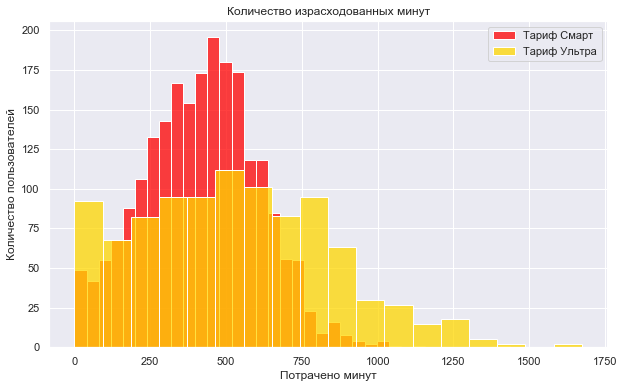

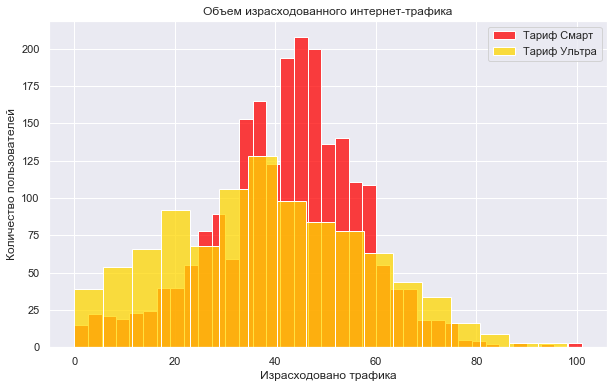

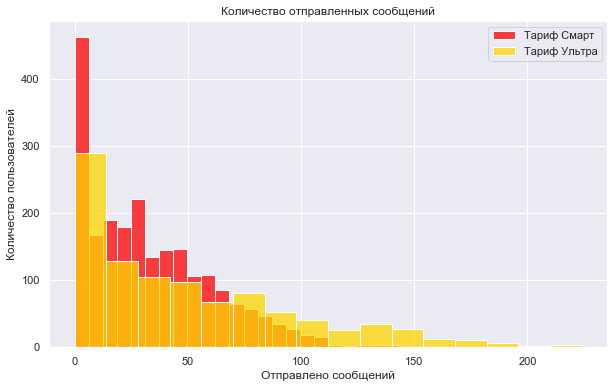

In [59]:
# построим графики для распределений

# словарь для графиков
dict_for_hist = {'calls_duration' : ['Количество израсходованных минут', 'Потрачено минут'],
                 'internet_mb_used' : ['Объем израсходованного интернет-трафика', 'Израсходовано трафика'],
                 'messages_sent' : ['Количество отправленных сообщений', 'Отправлено сообщений']}

sns.set(rc={'figure.figsize':(10, 6)})

# цикл для построения
for column in dict_for_hist.keys():
    sns.histplot(data = new_table.query('tariff == "smart"')[column], label='Тариф Смарт', color = 'red')
    sns.histplot(data = new_table.query('tariff == "ultra"')[column], label='Тариф Ультра', color = 'gold')
    plt.title(dict_for_hist[column][0])
    plt.xlabel(dict_for_hist[column][1])
    plt.ylabel('Количество пользователей')
    plt.legend()
    plt.show();

#### Вывод


#### Статистики тарифа "Смарт"
- Средние значения столбцов: calls_count - 58 звонков, calls_duration - 418 минут, internet_mb_used - 40 гигабайт, messages_sent - 33 сообщения;
- Дисперсия: calls_count - 672, calls_duration - 36203, internet_mb_used - 223, messages_sent - 796;
- Стандартное отклонение - calls_count - 25, calls_duration - 190, internet_mb_used - 14, messages_sent - 28.

---

#### Статистики тарифа "Ультра"
- Средние значения столбцов: calls_count - 73 звонка, calls_duration - 527 минут, internet_mb_used - 35 гигабайт, messages_sent - 49 сообщения;
- Дисперсия: calls_count - 1926, calls_duration - 100771, internet_mb_used - 382, messages_sent - 2282;
- Стандартное отклонение - calls_count - 44, calls_duration - 318, internet_mb_used - 39, messages_sent - 48.

---

#### Описание распределений  на основании графиков

#### График "Количество израсходованных минут"
- Тарифом "Смарт" пользуется больше пользователей, чем тарифом "Ультра";
- Основной расход минут на тарифе "Смарт" распределен на промежутке от 150 до 700 минут, с последующим спадом до нуля;
- Основной расход минут на тарифе "Ультра" распределен на промежутке от 0 до 1300 минут, с последующим спадом до нуля;
- Пользователи тарифа "Смарт" чаще превышают лимит, установленный тарифным планом.

#### Тарифом "Смарт" пользуется большое количество людей. Они чаше превышают лимит минут, установленных тарифным планом, что приводит к дополнительным тратам на обслуживание.

---

#### График "Объем израсходованного интернет-трафика"
- Тариф "Смарт" пользуется больше людей;
- Основной объем израсходованного трафика на тарифе "Смарт" распределен в диапазоне от 8 гигабайт до 25 гигабайт;
- Основной объем израсходованного трафика на тарифе "Ультра" распределен в диапазоне от 5 гигабайт до 35 гигабайт;
- Пользователи тарифа "Смарт" чаще превышают лимит, установленный тарифным планом.

#### Тарифом "Смарт" пользуется большое количество людей. Они чаше превышают лимит минут, установленных тарифным планом, что приводит к дополнительным тратам на обслуживание.  Пользователи тарифа "Ультра" тоже превышают установленный лимит, но не так часто, что может свидетельствовать о достаточном объеме лимитного трафика.

---

#### График "Количество отправленных сообщений"
- Тарифом "Смарт" пользуется большое количество людей;
- Некоторое пользователи практически не пользуются смс-сообщениями, о чем говорит и маленькое количество отправленных сообщений на обоих тарифах, и графические распределения;
- Пользователи тарифа "Смарт" снова превышают установленный лимит, а пользователи тарифа "Ультра" едва ли используют 25% предоставленного лимита.

#### Тарифом "Смарт" пользуется большое количество людей. Пользователи тарифа "Смарт" чаще превышают установленный лимит. Пользователи тарифа "Ультра" практически не отправляют сообщений.

--- 

#### Общий вывод:
- Тарифом "Смарт" пользуется большее количество людей;
- Пользователи тарифа "Смарт" чаще превышают лимит, установленный на звонки, смс и интернет;
- Пользователи тарифа "Смарт" чаще переплачивают, соответственно, приносят большую выручку;
- Несмотря на то, что тариф "Ультра" более дорогой, он более удобен для пользователей.

#### Сделаю предположение: тарифный план "Смарт" для компании выгоднее, чем тарифный план "Ультра".

### <a id='step5'>Проверка гипотез</a>

In [60]:
# создаю отдельные датафреймы с выручкой пользователей для каждого тарифного плана

# smart
profit_smart = new_table[new_table['tariff'] == 'smart']['profit']

# ultra
profit_ultra = new_table[new_table['tariff'] == 'ultra']['profit']

#### H0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается.
#### H1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

In [61]:
# проверим гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

alpha = .05  # критический уровень статистической значимости 

# ttest
results = st.ttest_ind(profit_smart, profit_ultra, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.366123216919074e-132
Отвергаем нулевую гипотезу


In [62]:
# создаю отдельные датафреймы с выручкой пользователей для каждого тарифного плана для Москвы, Санкт-Петербурга и регионов

# для этого произведем категоризацию столбца 'city' датафрейма users отделив Москву от регионов
def category(city):
    if 'Москва' in city:
        return 'Москва'
    return 'Регион'

# добавим столбец
new_table['city_category'] = new_table['city'].apply(category)

# датасет для Москвы
profit_msc = new_table[new_table['city_category'] == 'Москва']['profit']

# датасет для регионов
profit_reg = new_table[new_table['city_category'] == 'Регион']['profit']

#### H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
#### H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [63]:
# проверим гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

alpha = .05

# ttest
results = st.ttest_ind(profit_msc, profit_reg, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.25438147756433427
Не получилось отвергнуть нулевую гипотезу


### <a id='step6'>Общий вывод</a>

#### Задачей проекта было определить какой тарифный план выгоднее для компании.

#### Средняя вырчука с каждого пользователя составила:
- Тариф "Смарт" - 692 рубля;
- Тариф "Ультра" - 1950 рублей.

---

#### Характеристика тарифных планов
- Пользователей тарифного плана "Смарт" больше, чем пользователей тарифа "Ультра";
- Пользователи тарифного плана "Смарт" чаще превышает установленный лимит на звонки, смс и интернет;
- Пользователи тарифного плана "Смарт" чаще превышают установленные лимит и, соответственное, приносят большую выручку;
- Тарифный план "Ультра" дороже, но более удобен для пользователей.

#### В проекте также необходимо было проверить гипотезы:
- h0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;
- h1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
#### Гипотеза h0 была отвергнута, а значит, что выручка между пользователями тарифа "Смарт" и "Ультра" различается.

---

- h0.1 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
- h.1.1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
#### Гипотеза h.0.1 не была отвергнута, что может говорить о том, что выручка между пользователями из Москвы не отличается от выручки пользователей из регионов.

---

#### По результатам исследования можно сделать вывод о том, что тариф "Смарт" выгоднее для компании, чем тариф "Ультра". Это обусловлено тем, что на нем пользователи чаще совершают перерасходы установленных лимит и, соотвественно, чаще приносят дополнительную выручку.